# Text to Image

In [1]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("../checkpoints/sd_turbo", torch_dtype=torch.float16, variant="fp16")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [2]:
pipe.to("cuda:4")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "../checkpoints/sd_turbo",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/1 [00:00<?, ?it/s]

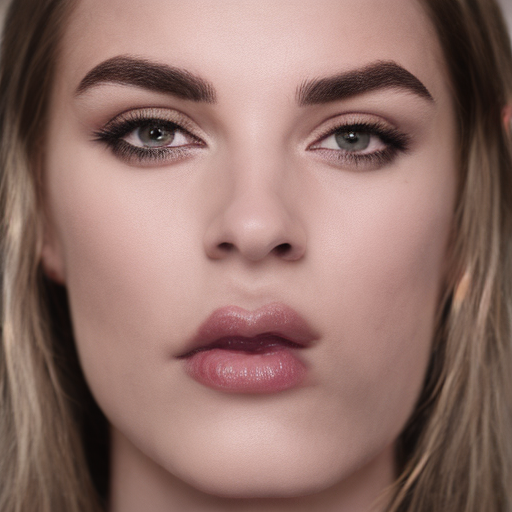

In [6]:
prompt = "This person has oval face, high cheekbones, arched eyebrows, and mouth slightly open and wears heavy makeup. She is young, and attractive."
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
image

# Image to Image

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/1 [00:00<?, ?it/s]

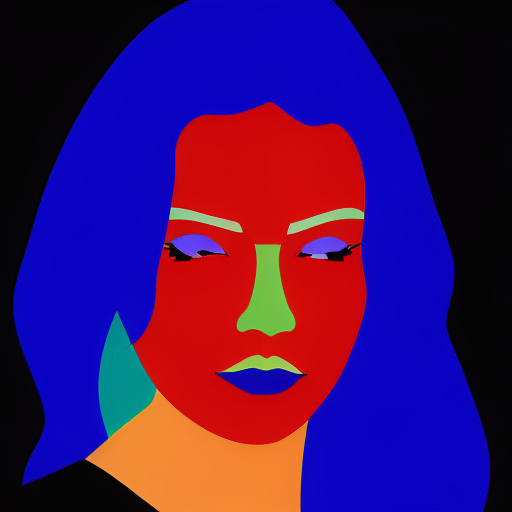

In [8]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image
import torch

pipe = AutoPipelineForImage2Image.from_pretrained("../checkpoints/sd_turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda:4")

init_image = load_image("../data/mmcelebahq/mask/5.png").resize((512, 512))
prompt = "This person has wavy hair and is wearing necklace, and lipstick. She is attractive."

image = pipe(prompt, image=init_image, num_inference_steps=2, strength=0.5, guidance_scale=0.0).images[0]
image